### ECG Signal Classification (5 classes) 
This file shows how  to load the data and get X_train, Y_train, X_test, Y_test

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn


In [2]:
import pandas as pd
X=pd.read_csv('ECG_dataX.csv')
Y=pd.read_csv('ECG_dataY.csv')
#no missing values in the data

In [3]:
#convert dataframe to numpy array
X=X.values
X.shape 

(3841, 187)

In [4]:
#convert dataframe to numpy array
Y=Y.values
Y.shape

(3841, 1)

In [5]:
#reshape Y into a 1D array
Y=Y.reshape(-1)
Y.shape

(3841,)

(array([800.,   0., 800.,   0.,   0., 800.,   0., 641.,   0., 800.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

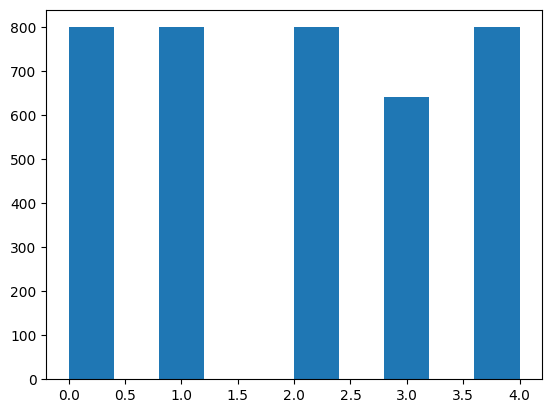

In [6]:
plt.hist(Y)

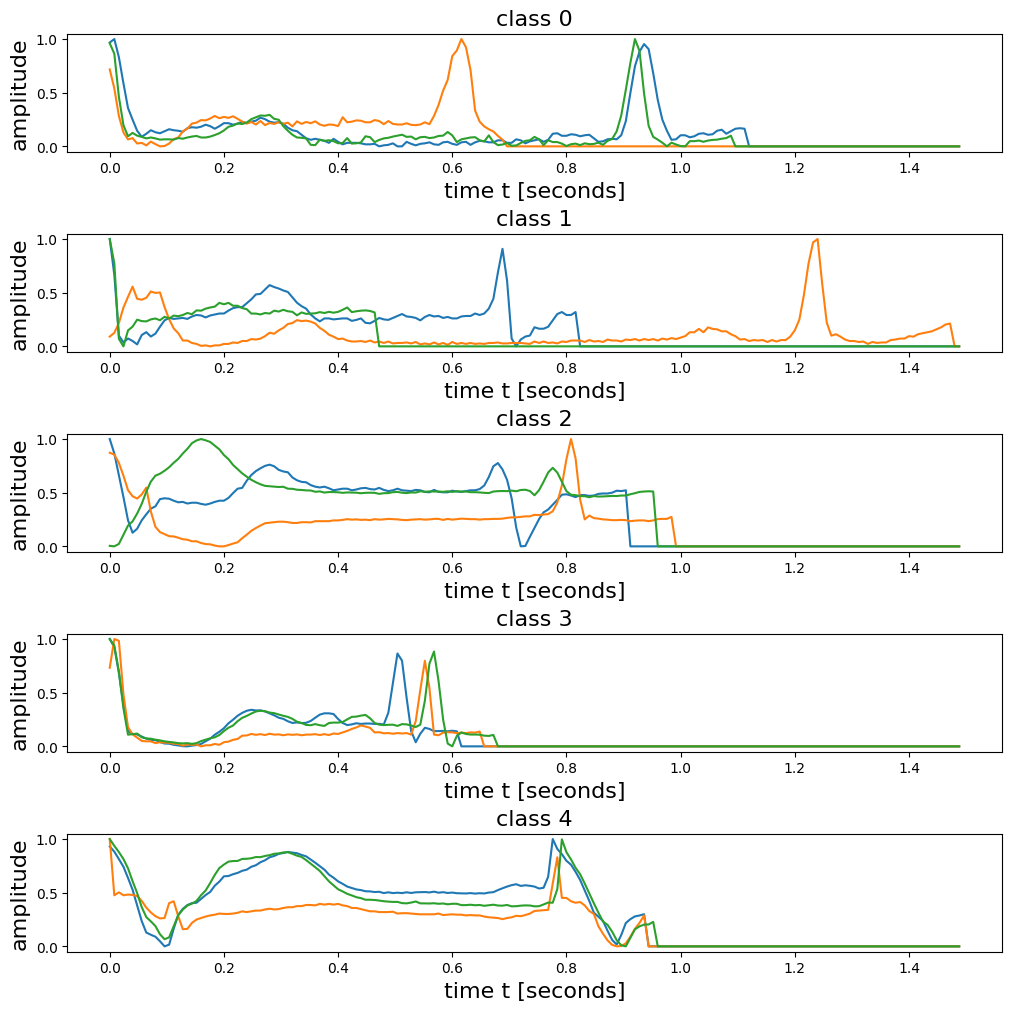

In [7]:
fs=125  # sampling frequency
Ts=1/fs # sampling interval
N=187 # the number of timepoints
Duration=N*Ts # duration of a signal
t=np.linspace(0, Duration-Ts, N) # array of timepoints
fig, ax = plt.subplots(5,1,constrained_layout=True, figsize=(10,10))
for c in range(0, 5):   
    for n in range(0, 3):
        idx=np.random.randint(0,10)
        ax[c].plot(t, X[Y==c][idx])        
        ax[c].set_xlabel('time t [seconds]', fontsize=16)
        ax[c].set_ylabel('amplitude', fontsize=16)
    ax[c].set_title('class '+str(c), fontsize=16)

Split the data into a training set and a test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)

In [9]:
X_train.shape
#3072 samples in the training set, each sample has 187 elements

(2764, 187)

In [10]:
[X_train.min(), X_train.max()] #no need for normalization

[0.0, 1.0]

In [11]:
Y_train.shape

(2764,)

In [12]:
[Y_train.min(), Y_train.max()] #5 classes

[0, 4]

In [13]:
X_test.shape
#769 samples in the training set, each sample has 187 elements

(769, 187)

In [14]:
[X_test.min(), X_test.max()] #no need for normalization

[0.0, 1.0]

In [15]:
Y_test.shape

(769,)

In [16]:
[Y_test.min(), Y_test.max()] #5 classes

[0, 4]

In [17]:
#KNEIGHBOR REGRESSOR PART 2 FIND OPTIMAL
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()

knn_param_grid = {'n_neighbors': list(range(1, 20))}
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, Y_train)

best_knn = knn_grid_search.best_estimator_

knn_train = accuracy_score(Y_train, best_knn.predict(X_train))
knn_test = accuracy_score(Y_test, best_knn.predict(X_test))

print('training accuracy = ', knn_train) 
print('test accuracy = ', knn_test)

training accuracy =  1.0
test accuracy =  0.8764629388816645


In [18]:
#DECISION TREE FIND OPTIMAL 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()

param_grid_dt = {'max_depth': list(range(1, 20))}
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, Y_train)

best_dt = grid_search_dt.best_estimator_

train_accuracy_dt = accuracy_score(Y_train, best_dt.predict(X_train))
test_accuracy_dt = accuracy_score(Y_test, best_dt.predict(X_test))

print('training accuracy = ', train_accuracy_dt)
print('test accuracy = ',test_accuracy_dt )


training accuracy =  0.9963820549927641
test accuracy =  0.8075422626788037


In [20]:
#RANDOM FOREST CLASSIFIER FIND OPTIMAL
import pandas as pd 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

param_grid_rf = {'max_depth': list(range(1, 20))}

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, Y_train)
best_rf = grid_search_rf.best_estimator_


train_accuracy_rf = accuracy_score(Y_train, best_rf.predict(X_train))
test_accuracy_rf = accuracy_score(Y_test, best_rf.predict(X_test))

print('training accuracy = ', train_accuracy_rf)
print('test accuracy = ',test_accuracy_rf )


training accuracy =  0.9992764109985528
test accuracy =  0.9024707412223667


In [21]:
#Table 

data = {
   "KNeighborsClassifier": [knn_train, knn_test],
   "DecisionTreeClassifier": [train_accuracy_dt, test_accuracy_dt],
   "RandomForestClassifier": [train_accuracy_rf, test_accuracy_rf]
}
df = pd.DataFrame(data)

df.style \
  .format(precision=10, thousands=".", decimal=".") \
  .format_index(str, axis=1) \
  .relabel_index(["training accuracy", "test accuracy"], axis=0)


,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier
training accuracy,1.0000000000,0.9963820550,0.9992764110
test accuracy,0.8764629389,0.8075422627,0.9024707412
